In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,I Saw Mommy Kissing Santa Claus,2002
1,"Bikini-Blitzkrieg, Part One: Dance Domination",2006
2,Kirk kulok siri,1992
3,The Story of Jonah and the Whale (Sort of...),2010
4,Church of Redemption,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [5]:
# What are the ten most common movie names of all time?

titles.title.value_counts().head(10)

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
Maya                    11
She                     11
Eva                     10
Blood Money             10
Othello                 10
Love                    10
dtype: int64

In [6]:
# Which three years of the 1930s saw the most films released?

t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937    1188
1936    1130
1938    1116
dtype: int64

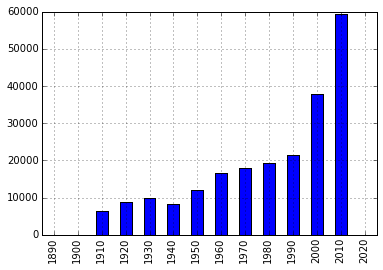

In [7]:
# Plot the number of films that have been released each decade
# over the history of cinema.

t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

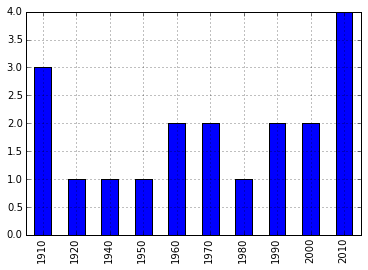

In [8]:
# Plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

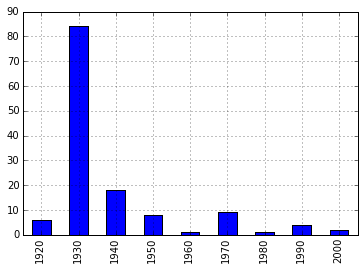

In [9]:
# Plot the number of "Rustler" characters
# in each decade of the history of film.

c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

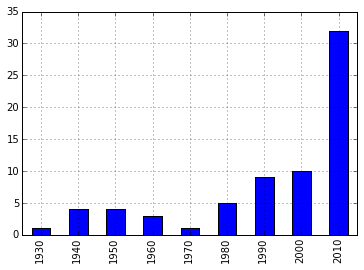

In [24]:
# Plot the number of "Batman" characters each decade.

c = cast
c = c[c.character == 'Batman']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

In [11]:
# What are the 11 most common character names in movie history?

cast.character.value_counts().head(11)

Himself        18883
Dancer         11266
Extra           9291
Reporter        7708
Doctor          6941
Policeman       6558
Student         6529
Nurse           6252
Bartender       6241
Party Guest     6130
Minor Role      6002
dtype: int64

In [12]:
# Who are the 10 people most often credited as "Herself" in film history?

c = cast
c[c.character == 'Herself'].name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      8
Joan Rivers            7
Mary Jo Pehl           7
Lili?n Garc?a          7
Lady Gaga              5
Marilyn Monroe         5
Juhi Chawla            5
Bunny Yeager           5
dtype: int64

In [13]:
# Who are the 10 people most often credited as "Himself" in film history?

c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             94
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          25
Ron Jeremy               25
Bill Clinton             20
Winston Churchill        20
George W. Bush           20
Franklin D. Roosevelt    20
Benito Mussolini         18
dtype: int64

In [14]:
# Which actors or actresses appeared in the most movies in the year 1945?

cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     30
Harold Miller       29
Bess Flowers        28
Nolan Leary         27
Frank O'Connor      26
Franklyn Farnum     25
Tom London          24
Edmund Cobb         24
Charles Sullivan    24
dtype: int64

In [15]:
# Which actors or actresses appeared in the most movies in the year 1985?

cast[cast.year == 1985].name.value_counts().head(10)

Mammootty           19
Shakti Kapoor       19
Sukumari            17
Lou Scheimer        15
Aruna Irani         14
Rajesh Khanna       13
Deven Verma         13
Mohanlal            13
Raj Babbar          13
Satyendra Kapoor    12
dtype: int64

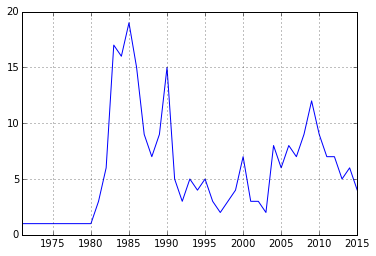

In [16]:
# Plot how many roles Mammootty has played in each year of his career.

cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

In [17]:
# What are the 10 most frequent roles that start with the phrase "Patron in"?

c = cast
c[c.character.str.startswith('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
dtype: int64

In [18]:
# What are the 10 most frequent roles that start with the word "Science"?

c = cast
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         54
Science Student          9
Science Fair Student     9
Science Reporter         5
Science Club Member      5
Science Fair Judge       4
Science Promo Cadet      4
Science Kid              4
Science teacher          3
Science Fair Teacher     3
dtype: int64

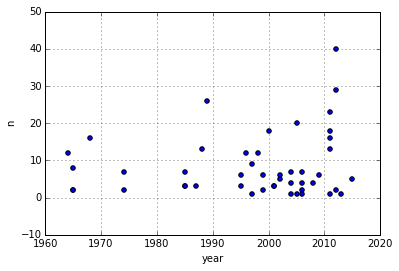

In [19]:
# Plot the n-values of the roles that Judi Dench has played over her career.

c = cast
c = c[c.name == 'Judi Dench'].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

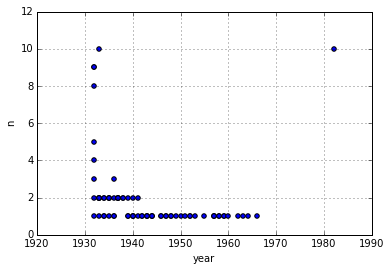

In [20]:
# Plot the n-values of Cary Grant's roles through his career.

c = cast
c = c[c.name == 'Cary Grant'].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

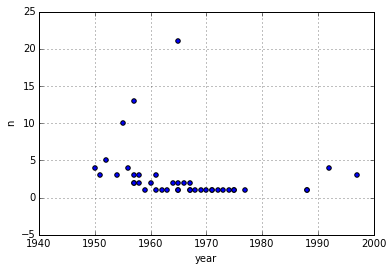

In [21]:
# Plot the n-value of the roles that Sidney Poitier has acted
# over the years.

c = cast
c = c[c.name == 'Sidney Poitier'].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

In [22]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      6412
actress    2833
dtype: int64

In [23]:
# How many supporting (n=2) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actress    4421
actor      4407
dtype: int64